## Problem Statement

The goal here is to train a binary classifier on the training dataset to predict the ‘Income’ column which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset. 

**About the dataset**

The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.

Each row is labeled as either having a salary greater than ">50K" or "<=50K".

The categorical columns are: workclass, education, marital_status, occupation, relationship, race, sex, native_country
The continuous columns are: age, education_num, capital_gain, capital_loss, hours_per_week

## Attribute Information

**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: continuous.

**capital-loss**: continuous.

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**class**: >50K, <=50K

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Data Analysis and Preparation](#data_preparation)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Dimension](#Data_Shape)
        - 3.1.2 - [Data Types](#Data_Types)
        - 3.1.3 - [Summary Statistics](#Summary_Statistics)
        - 3.1.4 - [AnalyzeVariables](#variables)
        - 3.1.5 - [Missing Values](#Missing_Values)
        - 3.1.6 - [Discover Outliers](#outliers)
        - 3.1.7 - [Correlation](#correlation)
        - 3.1.8 - [Feature Engineering](#Feature_Engineering)
        - 3.1.9- [Encoding of Categorical Variables](#Encoding)
4. **[Model Building](#Model)**
    - 4.1 - [Logistic Regression](#Logistic_regression)
        - 4.1.1 [Confusion Matrix](#Plot_confusion_matrix)
        - 4.1.2 [Performance Matrix](#Performance_matrix)
    - 4.2 - [Naive Bayes](#Naive_Bayes)
        - 4.2.1- [Smote](#Smote)
        - 4.2.2-[Naive Bayes after Smote technique](#After_Applying_smote_technique)
    - 4.3 - [K-Nearest Neighbour](#K-Nearest_Neighbour)
        - 4.3.1 [Build Confusion Matrix](#Build_confusion_matrix)
        - 4.3.2 [Performance Matrix](#Performance_Matrix)
        - 4.3.3 [ROC Curve](#ROC_curve)
        - 4.3.4 [Optimal Value of K (using GridSearchCV)](#GridSearchCV)   
    - 4.4 - [Decision Tree](#Decision_Tree) 
    - 4.5 -[Comparision Between Models](#CBM)
    - 4.6 -[XGBoost Classifier](#XGBoost_Classifier)
        - 4.6.1 [Features Importance](#FI)
    - 4.7 [Conclusion](#Conclusion)

**Let us import the required libraries and functions**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style='white', context='notebook', palette='deep')

## Read Data

In [2]:
dataset = pd.read_csv("Expense.csv")
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


## Data Analysis and Preparation

In [3]:
dataset.shape

(5000, 14)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


### Summary Statistics

In [5]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.656000,10.065000,1104.080000,90.032800,40.566200
std,13.698292,2.558141,7579.674371,404.168991,12.154191
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3004.000000,99.000000


### Analyze Variables

In [4]:
for i in dataset.select_dtypes(include= 'object').columns:
    print(dataset[i].value_counts())
    print('------------------------')

workclass
Private             3444
Self-emp-not-inc     385
?                    320
Local-gov            318
State-gov            199
Self-emp-inc         184
Federal-gov          148
Without-pay            1
Never-worked           1
Name: count, dtype: int64
------------------------
education
HS-grad         1602
Some-college    1142
Bachelors        823
Masters          259
Assoc-voc        214
11th             179
Assoc-acdm       157
10th             156
7th-8th          105
Prof-school       90
9th               84
12th              57
Doctorate         56
5th-6th           46
1st-4th           25
Preschool          5
Name: count, dtype: int64
------------------------
marital-status
Married-civ-spouse       2294
Never-married            1643
Divorced                  683
Separated                 159
Widowed                   150
Married-spouse-absent      67
Married-AF-spouse           4
Name: count, dtype: int64
------------------------
occupation
Craft-repair         630
Prof-

* Summary of the dataset shows that there are no missing values. But the preview shows that the dataset contains values coded as `?`. So, we will encode `?` as NaN values.

### Missing Value Treatment

In [5]:
dataset[dataset == ' ?'] = np.nan

In [8]:
for i in dataset.select_dtypes(include= 'object').columns:
    print(dataset[i].value_counts())
    print('------------------------')

workclass
Private             3444
Self-emp-not-inc     385
Local-gov            318
State-gov            199
Self-emp-inc         184
Federal-gov          148
Without-pay            1
Never-worked           1
Name: count, dtype: int64
------------------------
education
HS-grad         1602
Some-college    1142
Bachelors        823
Masters          259
Assoc-voc        214
11th             179
Assoc-acdm       157
10th             156
7th-8th          105
Prof-school       90
9th               84
12th              57
Doctorate         56
5th-6th           46
1st-4th           25
Preschool          5
Name: count, dtype: int64
------------------------
marital-status
Married-civ-spouse       2294
Never-married            1643
Divorced                  683
Separated                 159
Widowed                   150
Married-spouse-absent      67
Married-AF-spouse           4
Name: count, dtype: int64
------------------------
occupation
Craft-repair         630
Prof-specialty       619
Exec-

In [6]:
dataset.isnull().sum()

age                 0
workclass         320
education           0
education-num       0
marital-status      0
occupation        321
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     98
Expense             0
dtype: int64

In [7]:
dataset.isnull().sum()/len(dataset)*100

age               0.00
workclass         6.40
education         0.00
education-num     0.00
marital-status    0.00
occupation        6.42
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.96
Expense           0.00
dtype: float64

the variables - workclass, occupation and native-country contain missing values. All of these variables are categorical data type. So, we will impute the missing values with the most frequent value i.e, mode.

### Discover Outliers

<AxesSubplot:xlabel='Expense', ylabel='age'>

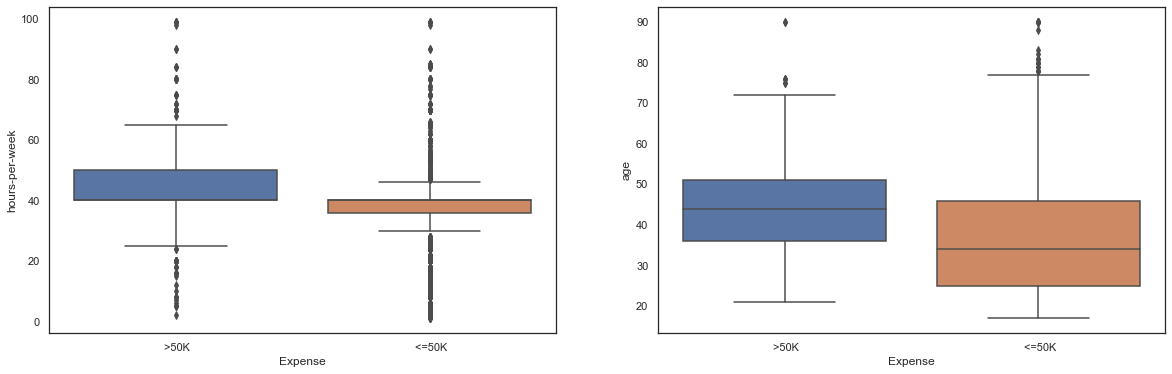

In [14]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours-per-week',x='Expense',data=dataset,ax=a)
sns.boxplot(y='age',x='Expense',data=dataset,ax=b)


### Target distribution

In [9]:
dataset['Expense'].value_counts()

Expense
<=50K    3776
>50K     1224
Name: count, dtype: int64

In [10]:
dataset['Expense'].unique()

array([' >50K', ' <=50K'], dtype=object)

In [11]:
dataset['Expense'] = dataset['Expense'].map({' <=50K': 0, ' >50K': 1})

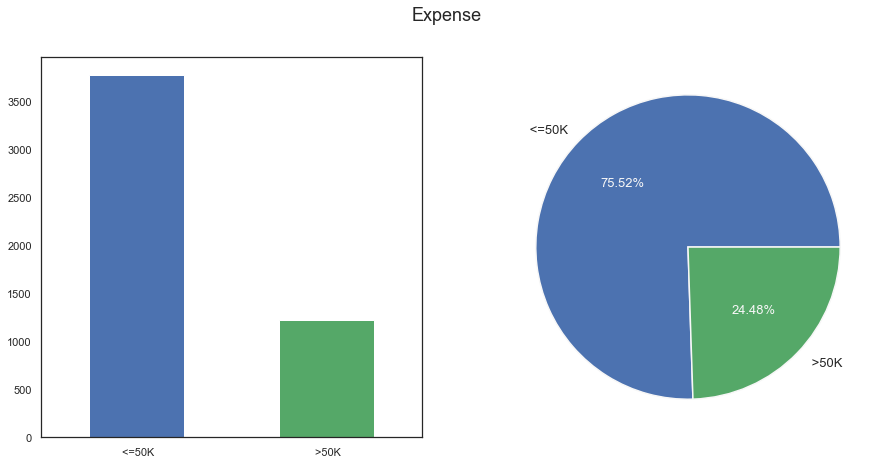

In [18]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Expense", fontsize = 18.)
_ = dataset.Expense.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = [" <=50K", " >50K"])
_ = dataset.Expense.value_counts().plot.pie(labels = (" <=50K", " >50K"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

#### Impute missing values with mode

In [12]:
for col in ['workclass', 'occupation', 'native-country']:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [13]:
dataset.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

* Now we can see that there are no missing values in the dataset.

<a id='correlation'></a>
### 3.1.7 Correlation

#### Correlation Matrix for Numeric Data

<Axes: >

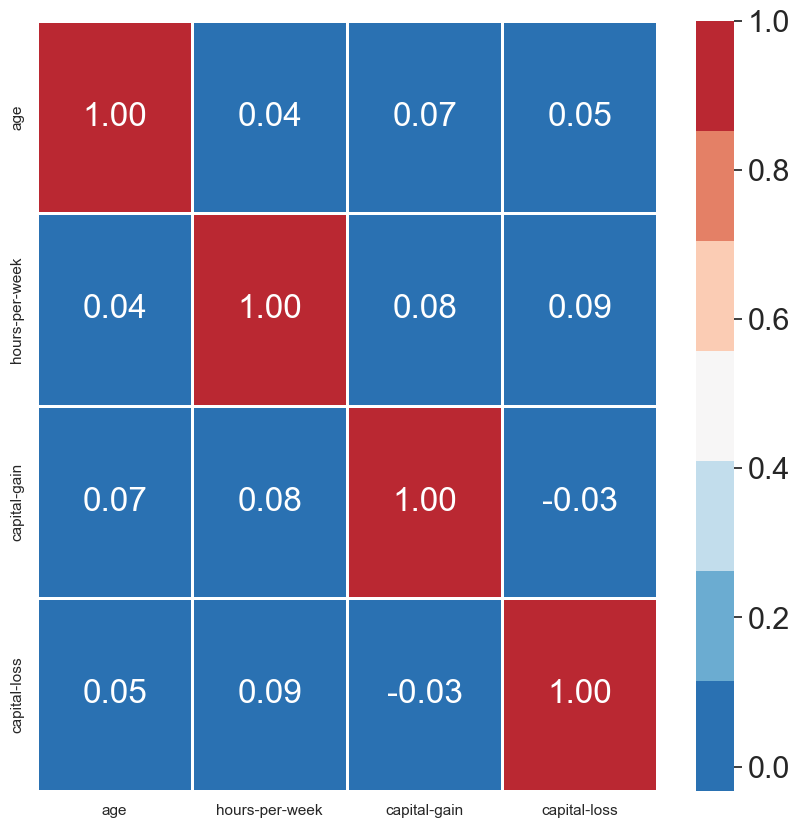

In [14]:
numeric_columns = ['age','hours-per-week','capital-gain','capital-loss']

fig, axe = plt.subplots(figsize=(10,10))
sns.set_context("poster")
sns.set(font_scale=2)
map1 = sns.color_palette("RdBu_r", 7)
sns.heatmap(dataset[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2,cmap = map1)

The heatmap indicates that the Age , hours.per.week , capital.gain & capital.loss are independept of each other

### Feature Engineering

In [19]:
# Create Married Column - Binary Yes(1) or No(0)

dataset["marital-status"] = dataset["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
dataset["marital-status"] = dataset["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
dataset["marital-status"] = dataset["marital-status"].map({"Married":1, "Single":0})
dataset["marital-status"] = dataset["marital-status"].astype(int)

dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Expense
0,39,Self-emp-inc,Bachelors,13,1,Exec-managerial,Husband,White,Male,15024,0,50,1
1,20,Private,Some-college,10,0,Other-service,Own-child,White,Male,0,0,40,0
2,50,Private,Doctorate,16,1,Prof-specialty,Husband,White,Male,0,1902,65,1
3,38,State-gov,HS-grad,9,1,Prof-specialty,Wife,White,Female,0,0,40,1
4,23,Local-gov,Bachelors,13,0,Prof-specialty,Own-child,White,Female,0,0,60,0


In [16]:
dataset.drop(columns = 'native-country', inplace= True)

In [20]:
x = dataset.drop(columns = 'Expense')
y = dataset['Expense']

In [21]:
xg = pd.get_dummies(x, drop_first= True, dtype= 'int')
xg.head()

,age,education-num,marital-status,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,13,1,15024,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,20,10,0,0,0,40,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
2,50,16,1,0,1902,65,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,38,9,1,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,23,13,0,0,0,60,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Model Building(Model)

**Split the data into training and test sets**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(xg, y, test_size= 0.30, stratify = y, random_state=0)

### Logistic Regression Model

In [23]:
import statsmodels
import statsmodels.api as sm

In [24]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: 0.322049
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3449
Method:                           MLE   Df Model:                           50
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.4214
Time:                        20:10:23   Log-Likelihood:                -1127.2
converged:                      False   LL-Null:                       -1948.1
Covariance Type:            nonrobust   LLR p-value:                4.150e-311
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0322      0.005      6.687      0.000       0.023       0.042
educatio

C:\Users\mirza\ana3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

In [26]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

### Confusion Matrix

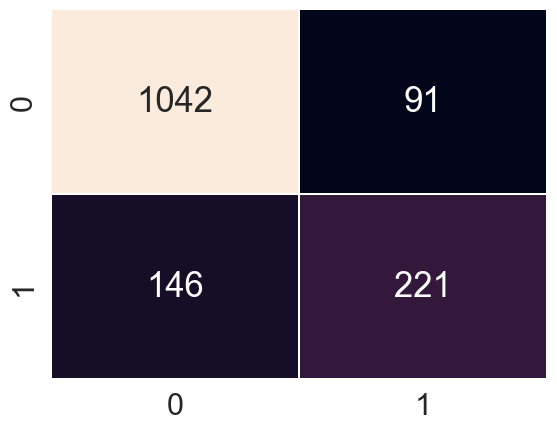

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.show()

### Naive Bayes Model

In [28]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = gnb.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1133
           1       0.64      0.64      0.64       367

    accuracy                           0.82      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.82      0.82      0.82      1500

0.8226666666666667


### Smote Model

In [30]:
# Applying SMoTE on the training set
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=0)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [31]:
y_train.value_counts()

Expense
0    2643
1    2643
Name: count, dtype: int64

### Naive Bayes after Smote technique

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred_default = gnb.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1133
           1       0.58      0.73      0.65       367

    accuracy                           0.81      1500
   macro avg       0.74      0.78      0.76      1500
weighted avg       0.83      0.81      0.81      1500

0.8053333333333333


### KNN Model

In [34]:
knn_classification = KNeighborsClassifier(n_neighbors = 7)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

#### Create a generalized function to calculate the performance metrics for the test set.

In [35]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

#### Define a function to plot the confusion matrix.

In [36]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Define a function to plot the ROC curve.

In [37]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

#### Build a confusion matrix.

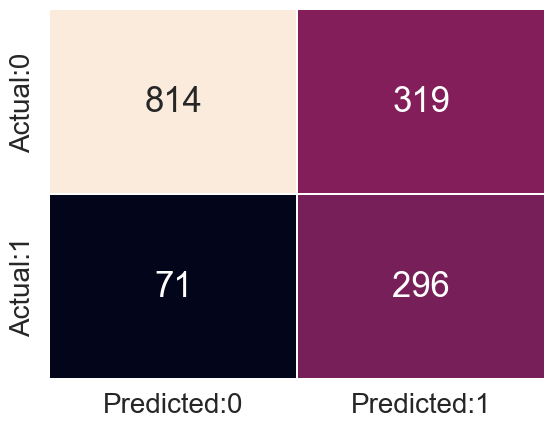

In [38]:
plot_confusion_matrix(knn_model)

### Performance Matrix

**Calculate performance measures on the test set.**

In [39]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1133
           1       0.48      0.81      0.60       367

    accuracy                           0.74      1500
   macro avg       0.70      0.76      0.70      1500
weighted avg       0.81      0.74      0.76      1500



**Plot the ROC curve.**

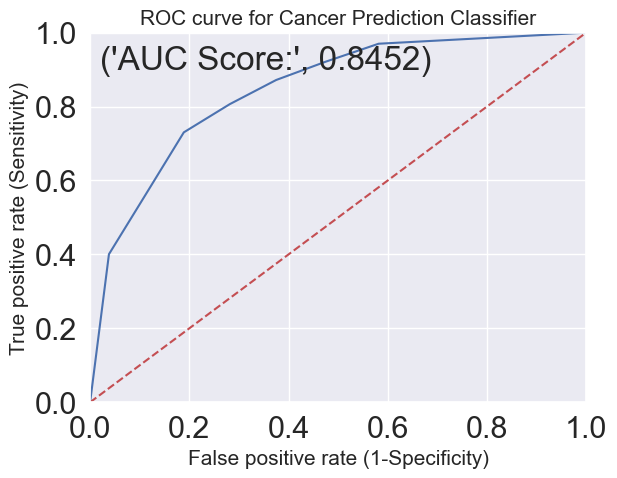

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plot_roc(knn_model)

In [ ]:
# From the above plot, we can see that our classifier (knn_model with n_neighbors = 7) is away from the dotted line; with the AUC score 0.845

<a id='GridSearchCV'></a>
### 4.3.4  Optimal Value of K (using GridSearchCV)

In [41]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 3} 



**Calculate performance measures on the test set.**

In [42]:
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      1133
           1       0.52      0.73      0.60       367

    accuracy                           0.77      1500
   macro avg       0.71      0.75      0.72      1500
weighted avg       0.81      0.77      0.78      1500



### Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1133
           1       0.50      0.56      0.53       367

    accuracy                           0.76      1500
   macro avg       0.68      0.69      0.68      1500
weighted avg       0.77      0.76      0.76      1500

0.756


### Comparison Betweeen models

In [80]:
# Using better and heavy classifiers can improve the accuracy, and good amount parameter optimization

In [45]:
outcome = []
Modelnames = []
models = []
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, max_features=4)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1)))

## XGBoost Model

In [46]:
from xgboost.sklearn import XGBClassifier

kfoldCV = StratifiedKFold(n_splits=5,shuffle=True,random_state=20)
xgb_model = XGBClassifier(n_estimators=250)
results = cross_val_score(xgb_model, X_train, y_train, cv=kfoldCV)

print("XGBClassifier: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
outcome.append(results)
Modelnames.append("XGBClassifier")

for name, model in models:
    kfoldCV = KFold(n_splits=5,shuffle=True,random_state=0)
    cv_r = cross_val_score(model, X_train, y_train, cv=kfoldCV, scoring='accuracy')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

XGBClassifier: 89.05% (0.62%)
Random Forest Classifier: 88.67% (0.64%)
Decision Tree Classifier: 85.02% (1.56%)
Logistic Regression: 83.54% (2.64%)
Naive Bayes: 82.99% (1.49%)
KNN: 86.04% (0.97%)


* We are getting the highest accuracy of XGBClassifier: 89.05% 

In [47]:
xgb_model = XGBClassifier(n_estimators=250).fit(X_train,y_train)

In [48]:
y_pred_default = xgb_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1133
           1       0.66      0.64      0.65       367

    accuracy                           0.83      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.83      0.83      0.83      1500

0.832


### Features Importance

In [49]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [51]:
feature_importances.head()

,importance
marital-status,0.176005
relationship_ Unmarried,0.070646
relationship_ Own-child,0.061446
education_ 12th,0.050210
capital-gain,0.048015


### Conclusion

`Relationship` ,`marital-status`, `capital-gain` & `education`  have the most impact on the segregation of >50K & <=50K.                               